# Converting photometry table from interactive photometry tool to a light curve

-Example WASP-36 b


Code Improvement notes
- needs ability to remove miss-clicked stars
- a guess for identical psf locations on next frame with ability to edit if they look incorrect
- ^reuse previous aperatures option? 
- update on psf photometry click not next click (prob with last frame)
- start next frame at same zoom level
- Save table to csv
- print statement on interface?
- quality flag button

New Code improvement notes
- still needs save dataframe to csv command
- Dropped observation time column? Not cool 
- still needs an undo star selection option 




In [ ]:
# specific frames 
# - frame 173 double clicked 5&6, star 7 actually star 6
# - frames 134,150 flipped stars 2 &3
#  - frame 193 star 3 failed, star 7 is star 3
# frame 194 peak error? star 2 and 3 flipped
# frame 179, missed star 2, replaced with star 7
# frame 158 2&3 flipped
#  frame 183, 4&5 are same star, 6 is 5, and 7 is 6
# frame 152, 8 is 4, 6 is 5, 7 is 6, discard 4&5
# frame 177, 7 is 2
# 


In [23]:
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

table: 

In [1]:
# Composite Photometry Measurements:        
raw = """file                Date-Obs Filter  Exptime  star_number  xpeak  ypeak  peak_counts     sum_flux  sum_flux_err
WASP36B.2025-02-17.0132_reduced.fits 2025-02-18T01:44:30.345      R    150.0            1    543    406 18561.968686 7.021457e+05    837.941345
WASP36B.2025-02-17.0132_reduced.fits 2025-02-18T01:44:30.345      R    150.0            2    425    340 19856.332142 6.702938e+05    818.714720
WASP36B.2025-02-17.0132_reduced.fits 2025-02-18T01:44:30.345      R    150.0            3    541    616 33238.964625 1.283649e+06   1132.982341
WASP36B.2025-02-17.0132_reduced.fits 2025-02-18T01:44:30.345      R    150.0            4    545    279 10811.677991 3.833859e+05    619.181609
WASP36B.2025-02-17.0132_reduced.fits 2025-02-18T01:44:30.345      R    150.0            5    537    240  5923.117031 2.002444e+05    447.486709
WASP36B.2025-02-17.0132_reduced.fits 2025-02-18T01:44:30.345      R    150.0            6    683    441  3411.649472 9.275520e+04    304.557383
WASP36B.2025-02-17.0135_reduced.fits 2025-02-18T01:52:14.432      R    150.0            1    543    405 24454.118411 6.617944e+05    813.507467
WASP36B.2025-02-17.0135_reduced.fits 2025-02-18T01:52:14.432      R    150.0            2    424    339 27599.613649 7.247783e+05    851.339095
WASP36B.2025-02-17.0135_reduced.fits 2025-02-18T01:52:14.432      R    150.0            3    541    615 44170.865010 1.264819e+06   1124.641543
WASP36B.2025-02-17.0135_reduced.fits 2025-02-18T01:52:14.432      R    150.0            4    545    278 14643.211694 3.617854e+05    601.486028
WASP36B.2025-02-17.0135_reduced.fits 2025-02-18T01:52:14.432      R    150.0            5    537    240  7847.239282 1.911802e+05    437.241573
WASP36B.2025-02-17.0135_reduced.fits 2025-02-18T01:52:14.432      R    150.0            6    683    440  4490.552304 1.012203e+05    318.151438
WASP36B.2025-02-17.0167_reduced.fits 2025-02-18T03:15:50.730      R    150.0            1    545    407 25160.364700 5.811290e+05    762.318165
WASP36B.2025-02-17.0167_reduced.fits 2025-02-18T03:15:50.730      R    150.0            2    426    341 28052.205860 6.323658e+05    795.214304
WASP36B.2025-02-17.0167_reduced.fits 2025-02-18T03:15:50.730      R    150.0            3    543    617 46862.784957 1.234002e+06   1110.856369
WASP36B.2025-02-17.0167_reduced.fits 2025-02-18T03:15:50.730      R    150.0            4    547    280 15114.154427 3.453382e+05    587.654838
WASP36B.2025-02-17.0167_reduced.fits 2025-02-18T03:15:50.730      R    150.0            5    538    241  8568.106849 1.798118e+05    424.042203
WASP36B.2025-02-17.0167_reduced.fits 2025-02-18T03:15:50.730      R    150.0            6    685    442  4873.948662 9.686677e+04    311.234270
WASP36B.2025-02-17.0160_reduced.fits 2025-02-18T02:57:57.963      R    150.0            1    544    406 22228.483888 5.774707e+05    759.914941
WASP36B.2025-02-17.0160_reduced.fits 2025-02-18T02:57:57.963      R    150.0            2    425    340 25683.100188 6.166337e+05    785.260255
WASP36B.2025-02-17.0160_reduced.fits 2025-02-18T02:57:57.963      R    150.0            3    542    616 41653.937911 1.077572e+06   1038.061424
WASP36B.2025-02-17.0160_reduced.fits 2025-02-18T02:57:57.963      R    150.0            4    546    279 13867.364242 2.896245e+05    538.167710
WASP36B.2025-02-17.0160_reduced.fits 2025-02-18T02:57:57.963      R    150.0            5    538    241  7431.681255 1.729675e+05    415.893648
WASP36B.2025-02-17.0160_reduced.fits 2025-02-18T02:57:57.963      R    150.0            6    684    441  4370.638172 9.328144e+04    305.420102
WASP36B.2025-02-17.0175_reduced.fits 2025-02-18T03:36:17.242      R    150.0            1    544    406 21826.598499 6.297120e+05    793.543973
WASP36B.2025-02-17.0175_reduced.fits 2025-02-18T03:36:17.242      R    150.0            2    425    340 23445.787395 7.709712e+05    878.049680
WASP36B.2025-02-17.0175_reduced.fits 2025-02-18T03:36:17.242      R    150.0            3    542    616 38967.613591 1.386878e+06   1177.657965
WASP36B.2025-02-17.0175_reduced.fits 2025-02-18T03:36:17.242      R    150.0            4    546    279 12760.050805 3.829243e+05    618.808777
WASP36B.2025-02-17.0175_reduced.fits 2025-02-18T03:36:17.242      R    150.0            5    537    240  7182.484293 1.999040e+05    447.106259
WASP36B.2025-02-17.0175_reduced.fits 2025-02-18T03:36:17.242      R    150.0            6    684    440  4049.261009 1.112189e+05    333.494955
WASP36B.2025-02-17.0172_reduced.fits 2025-02-18T03:28:39.035      R    150.0            1    544    406 26892.645880 7.306965e+05    854.807883
WASP36B.2025-02-17.0172_reduced.fits 2025-02-18T03:28:39.035      R    150.0            2    426    340 30151.219453 7.975393e+05    893.050543
WASP36B.2025-02-17.0172_reduced.fits 2025-02-18T03:28:39.035      R    150.0            3    542    616 48485.720657 1.153193e+06   1073.868083
WASP36B.2025-02-17.0172_reduced.fits 2025-02-18T03:28:39.035      R    150.0            4    547    279 16047.249025 3.369290e+05    580.455829
WASP36B.2025-02-17.0172_reduced.fits 2025-02-18T03:28:39.035      R    150.0            5    538    241  8732.749598 2.157050e+05    464.440570
WASP36B.2025-02-17.0172_reduced.fits 2025-02-18T03:28:39.035      R    150.0            6    684    441  5212.183816 1.144983e+05    338.375920
WASP36B.2025-02-17.0144_reduced.fits 2025-02-18T02:16:02.269      R    150.0            1    544    406 21242.224118 7.571259e+05    870.129846
WASP36B.2025-02-17.0144_reduced.fits 2025-02-18T02:16:02.269      R    150.0            2    426    340 24421.715515 6.826733e+05    826.240469
WASP36B.2025-02-17.0144_reduced.fits 2025-02-18T02:16:02.269      R    150.0            3    542    616 38342.920658 1.447713e+06   1203.209362
WASP36B.2025-02-17.0144_reduced.fits 2025-02-18T02:16:02.269      R    150.0            4    546    279 12854.103302 4.334751e+05    658.388259
WASP36B.2025-02-17.0144_reduced.fits 2025-02-18T02:16:02.269      R    150.0            5    538    240  7017.498013 1.832088e+05    428.028930
WASP36B.2025-02-17.0144_reduced.fits 2025-02-18T02:16:02.269      R    150.0            6    684    441  4109.869081 9.014467e+04    300.241017
WASP36B.2025-02-17.0143_reduced.fits 2025-02-18T02:13:29.596      R    150.0            1    545    407 20034.996477 6.113067e+05    781.861068
WASP36B.2025-02-17.0143_reduced.fits 2025-02-18T02:13:29.596      R    150.0            2    426    340 21751.108319 8.246673e+05    908.111931
WASP36B.2025-02-17.0143_reduced.fits 2025-02-18T02:13:29.596      R    150.0            3    543    617 36474.315266 1.440157e+06   1200.065297
WASP36B.2025-02-17.0143_reduced.fits 2025-02-18T02:13:29.596      R    150.0            4    547    280 11736.421572 4.295842e+05    655.426696
WASP36B.2025-02-17.0143_reduced.fits 2025-02-18T02:13:29.596      R    150.0            5    538    241  6658.469132 2.288012e+05    478.331641
WASP36B.2025-02-17.0143_reduced.fits 2025-02-18T02:13:29.596      R    150.0            6    685    442  3798.048908 9.937749e+04    315.241957
WASP36B.2025-02-17.0151_reduced.fits 2025-02-18T02:33:57.899      R    150.0            1    544    407 17370.747016 6.109743e+05    781.648442
WASP36B.2025-02-17.0151_reduced.fits 2025-02-18T02:33:57.899      R    150.0            2    426    341 19367.160260 7.032943e+05    838.626438
WASP36B.2025-02-17.0151_reduced.fits 2025-02-18T02:33:57.899      R    150.0            3    543    617 33029.963765 1.166451e+06   1080.023498
WASP36B.2025-02-17.0151_reduced.fits 2025-02-18T02:33:57.899      R    150.0            4    547    280 10447.098806 3.504212e+05    591.963848
WASP36B.2025-02-17.0151_reduced.fits 2025-02-18T02:33:57.899      R    150.0            5    538    241  5597.150249 1.770091e+05    420.724449
WASP36B.2025-02-17.0151_reduced.fits 2025-02-18T02:33:57.899      R    150.0            6    685    442  3514.689203 1.002364e+05    316.601253
WASP36B.2025-02-17.0173_reduced.fits 2025-02-18T03:31:12.103      R    150.0            1    544    406 22159.494320 5.180701e+05    719.770858
WASP36B.2025-02-17.0173_reduced.fits 2025-02-18T03:31:12.103      R    150.0            2    542    616 39743.330923 1.135023e+06   1065.374663
WASP36B.2025-02-17.0173_reduced.fits 2025-02-18T03:31:12.103      R    150.0            3    425    340 24255.396168 6.142626e+05    783.749049
WASP36B.2025-02-17.0173_reduced.fits 2025-02-18T03:31:12.103      R    150.0            4    546    279 13066.594147 3.160086e+05    562.146438
WASP36B.2025-02-17.0173_reduced.fits 2025-02-18T03:31:12.103      R    150.0            5    537    240  7258.091261 1.796248e+05    423.821652
WASP36B.2025-02-17.0173_reduced.fits 2025-02-18T03:31:12.103      R    150.0            6    537    240  7258.091261 1.796248e+05    423.821652
WASP36B.2025-02-17.0173_reduced.fits 2025-02-18T03:31:12.103      R    150.0            7    684    441  4044.397827 9.108710e+04    301.806389
WASP36B.2025-02-17.0174_reduced.fits 2025-02-18T03:33:44.574      R    150.0            1    544    406 24521.633134 5.988175e+05    773.832974
WASP36B.2025-02-17.0174_reduced.fits 2025-02-18T03:33:44.574      R    150.0            2    543    616 45349.269108 1.138728e+06   1067.111948
WASP36B.2025-02-17.0174_reduced.fits 2025-02-18T03:33:44.574      R    150.0            3    426    340 28529.711669 6.259516e+05    791.171011
WASP36B.2025-02-17.0174_reduced.fits 2025-02-18T03:33:44.574      R    150.0            4    546    279 14620.180983 3.319861e+05    576.182338
WASP36B.2025-02-17.0174_reduced.fits 2025-02-18T03:33:44.574      R    150.0            5    538    241  8349.379986 1.606400e+05    400.799196
WASP36B.2025-02-17.0174_reduced.fits 2025-02-18T03:33:44.574      R    150.0            6    684    441  4874.119647 9.902618e+04    314.684253
WASP36B.2025-02-17.0161_reduced.fits 2025-02-18T03:00:30.639      R    150.0            1    544    406 30093.886017 7.375905e+05    858.830863
WASP36B.2025-02-17.0161_reduced.fits 2025-02-18T03:00:30.639      R    150.0            2    426    340 33073.073494 7.814504e+05    883.996838
WASP36B.2025-02-17.0161_reduced.fits 2025-02-18T03:00:30.639      R    150.0            3    542    616 55084.840459 1.365665e+06   1168.616521
WASP36B.2025-02-17.0161_reduced.fits 2025-02-18T03:00:30.639      R    150.0            4    546    279 18065.382478 4.318195e+05    657.129731
WASP36B.2025-02-17.0161_reduced.fits 2025-02-18T03:00:30.639      R    150.0            5    538    241  9928.996750 2.199412e+05    468.978923
WASP36B.2025-02-17.0161_reduced.fits 2025-02-18T03:00:30.639      R    150.0            6    684    441  5954.419376 9.851618e+04    313.872873
WASP36B.2025-02-17.0134_reduced.fits 2025-02-18T01:49:38.284      R    150.0            1    545    407 23134.446990 5.677529e+05    753.493764
WASP36B.2025-02-17.0134_reduced.fits 2025-02-18T01:49:38.284      R    150.0            2    544    617 42261.539736 1.123503e+06   1059.954467
WASP36B.2025-02-17.0134_reduced.fits 2025-02-18T01:49:38.284      R    150.0            3    427    341 26305.007013 6.203981e+05    787.653571
WASP36B.2025-02-17.0134_reduced.fits 2025-02-18T01:49:38.284      R    150.0            4    548    280 13852.271766 3.151781e+05    561.407212
WASP36B.2025-02-17.0134_reduced.fits 2025-02-18T01:49:38.284      R    150.0            5    539    241  7632.996790 1.707376e+05    413.204101
WASP36B.2025-02-17.0134_reduced.fits 2025-02-18T01:49:38.284      R    150.0            6    686    442  4246.217448 7.730459e+04    278.037022
WASP36B.2025-02-17.0166_reduced.fits 2025-02-18T03:13:17.411      R    150.0            1    545    407 25053.362881 6.347964e+05    796.741104
WASP36B.2025-02-17.0166_reduced.fits 2025-02-18T03:13:17.411      R    150.0            2    426    341 27933.124673 6.703566e+05    818.753046
WASP36B.2025-02-17.0166_reduced.fits 2025-02-18T03:13:17.411      R    150.0            3    543    617 46302.647787 1.171893e+06   1082.540191
WASP36B.2025-02-17.0166_reduced.fits 2025-02-18T03:13:17.411      R    150.0            4    547    280 15042.708975 3.690644e+05    607.506725
WASP36B.2025-02-17.0166_reduced.fits 2025-02-18T03:13:17.411      R    150.0            5    538    241  8565.425203 1.622554e+05    402.809418
WASP36B.2025-02-17.0166_reduced.fits 2025-02-18T03:13:17.411      R    150.0            6    685    442  4812.412246 9.796971e+04    313.001136
WASP36B.2025-02-17.0133_reduced.fits 2025-02-18T01:47:05.012      R    150.0            1    542    405 16770.858798 7.811484e+05    883.826018
WASP36B.2025-02-17.0133_reduced.fits 2025-02-18T01:47:05.012      R    150.0            2    424    339 18411.817767 5.039631e+05    709.903586
WASP36B.2025-02-17.0133_reduced.fits 2025-02-18T01:47:05.012      R    150.0            3    541    615 30862.517941 1.427941e+06   1194.965034
WASP36B.2025-02-17.0133_reduced.fits 2025-02-18T01:47:05.012      R    150.0            4    544    277 10084.648148 4.254602e+05    652.273098
WASP36B.2025-02-17.0133_reduced.fits 2025-02-18T01:47:05.012      R    150.0            5    536    239  5724.285768 1.711495e+05    413.702162
WASP36B.2025-02-17.0133_reduced.fits 2025-02-18T01:47:05.012      R    150.0            6    682    440  3251.113900 8.406033e+04    289.931587
WASP36B.2025-02-17.0150_reduced.fits 2025-02-18T02:31:24.823      R    150.0            1    544    406 25353.898885 6.359067e+05    797.437556
WASP36B.2025-02-17.0150_reduced.fits 2025-02-18T02:31:24.823      R    150.0            2    543    616 46489.505450 1.057098e+06   1028.152729
WASP36B.2025-02-17.0150_reduced.fits 2025-02-18T02:31:24.823      R    150.0            3    426    340 29491.896847 6.918472e+05    831.773506
WASP36B.2025-02-17.0150_reduced.fits 2025-02-18T02:31:24.823      R    150.0            4    546    279 15441.557128 3.446453e+05    587.064974
WASP36B.2025-02-17.0150_reduced.fits 2025-02-18T02:31:24.823      R    150.0            5    538    240  8652.083956 1.827275e+05    427.466335
WASP36B.2025-02-17.0150_reduced.fits 2025-02-18T02:31:24.823      R    150.0            6    684    441  4771.651210 8.867220e+04    297.778779
WASP36B.2025-02-17.0142_reduced.fits 2025-02-18T02:10:56.187      R    150.0            1    544    406 11341.790318 5.822732e+05    763.068271
WASP36B.2025-02-17.0142_reduced.fits 2025-02-18T02:10:56.187      R    150.0            2    424    339 12828.006207 5.972419e+05    772.814303
WASP36B.2025-02-17.0142_reduced.fits 2025-02-18T02:10:56.187      R    150.0            3    541    617 20935.834279 1.081848e+06   1040.119002
WASP36B.2025-02-17.0142_reduced.fits 2025-02-18T02:10:56.187      R    150.0            4    546    278  6906.948743 2.995973e+05    547.354792
WASP36B.2025-02-17.0142_reduced.fits 2025-02-18T02:10:56.187      R    150.0            5    538    239  3871.641042 1.477668e+05    384.404514
WASP36B.2025-02-17.0142_reduced.fits 2025-02-18T02:10:56.187      R    150.0            6    684    441  2319.386085 7.071661e+04    265.925949
WASP36B.2025-02-17.0145_reduced.fits 2025-02-18T02:18:34.929      R    150.0            1    544    406 19145.085521 5.902434e+05    768.272981
WASP36B.2025-02-17.0145_reduced.fits 2025-02-18T02:18:34.929      R    150.0            2    426    341 22048.751159 6.781153e+05    823.477551
WASP36B.2025-02-17.0145_reduced.fits 2025-02-18T02:18:34.929      R    150.0            3    543    617 35910.478446 1.124825e+06   1060.577835
WASP36B.2025-02-17.0145_reduced.fits 2025-02-18T02:18:34.929      R    150.0            4    546    279 11644.602308 3.304987e+05    574.890138
WASP36B.2025-02-17.0145_reduced.fits 2025-02-18T02:18:34.929      R    150.0            5    538    241  6731.792131 1.752443e+05    418.621890
WASP36B.2025-02-17.0145_reduced.fits 2025-02-18T02:18:34.929      R    150.0            6    685    442  3777.531750 8.528901e+04    292.042821
WASP36B.2025-02-17.0148_reduced.fits 2025-02-18T02:26:16.447      R    150.0            1    544    406 21660.683464 7.557969e+05    869.365780
WASP36B.2025-02-17.0148_reduced.fits 2025-02-18T02:26:16.447      R    150.0            2    426    340 23684.028612 8.302559e+05    911.183791
WASP36B.2025-02-17.0148_reduced.fits 2025-02-18T02:26:16.447      R    150.0            3    542    616 39856.511917 1.445094e+06   1202.120827
WASP36B.2025-02-17.0148_reduced.fits 2025-02-18T02:26:16.447      R    150.0            4    546    279 12896.989029 4.271724e+05    653.584291
WASP36B.2025-02-17.0148_reduced.fits 2025-02-18T02:26:16.447      R    150.0            5    538    241  7092.377047 2.289385e+05    478.475206
WASP36B.2025-02-17.0148_reduced.fits 2025-02-18T02:26:16.447      R    150.0            6    684    441  4178.597489 8.934398e+04    298.904627
WASP36B.2025-02-17.0139_reduced.fits 2025-02-18T02:02:26.767      R    150.0            1    547    408 10533.827710 6.567296e+05    810.388567
WASP36B.2025-02-17.0139_reduced.fits 2025-02-18T02:02:26.767      R    150.0            2    428    342 11902.869932 5.576196e+05    746.739295
WASP36B.2025-02-17.0139_reduced.fits 2025-02-18T02:02:26.767      R    150.0            3    545    618 19859.884502 1.143114e+06   1069.164928
WASP36B.2025-02-17.0139_reduced.fits 2025-02-18T02:02:26.767      R    150.0            4    549    281  6276.240267 3.356075e+05    579.316412
WASP36B.2025-02-17.0139_reduced.fits 2025-02-18T02:02:26.767      R    150.0            5    540    242  3648.890552 1.728026e+05    415.695378
WASP36B.2025-02-17.0139_reduced.fits 2025-02-18T02:02:26.767      R    150.0            6    687    443  2111.091711 7.829573e+04    279.813738
WASP36B.2025-02-17.0193_reduced.fits 2025-02-18T04:22:16.948      R    150.0            1    544    406 19875.939222 5.992923e+05    774.139711
WASP36B.2025-02-17.0193_reduced.fits 2025-02-18T04:22:16.948      R    150.0            2    426    340 21611.478775 6.584352e+05    811.440226
WASP36B.2025-02-17.0193_reduced.fits 2025-02-18T04:22:16.948      R    150.0            3    570    601  -299.390731 0.000000e+00      0.000000
WASP36B.2025-02-17.0193_reduced.fits 2025-02-18T04:22:16.948      R    150.0            4    546    279 11525.834973 3.473679e+05    589.379212
WASP36B.2025-02-17.0193_reduced.fits 2025-02-18T04:22:16.948      R    150.0            5    538    241  6714.085558 1.759602e+05    419.476108
WASP36B.2025-02-17.0193_reduced.fits 2025-02-18T04:22:16.948      R    150.0            6    685    442  3741.441347 9.490277e+04    308.062929
WASP36B.2025-02-17.0193_reduced.fits 2025-02-18T04:22:16.948      R    150.0            7    543    616 34910.205685 1.120207e+06   1058.398230
WASP36B.2025-02-17.0194_reduced.fits 2025-02-18T04:24:50.026      R    150.0            1    544    406 20421.508365 5.987675e+05    773.800697
WASP36B.2025-02-17.0194_reduced.fits 2025-02-18T04:24:50.026      R    150.0            2    542    616 36769.771929 1.049702e+06   1024.549673
WASP36B.2025-02-17.0194_reduced.fits 2025-02-18T04:24:50.026      R    150.0            3    426    340 21528.450604 6.156112e+05    784.608925
WASP36B.2025-02-17.0194_reduced.fits 2025-02-18T04:24:50.026      R    150.0            4    546    278 11490.772371 3.247451e+05    569.864133
WASP36B.2025-02-17.0194_reduced.fits 2025-02-18T04:24:50.026      R    150.0            5    537    240  6487.082423 1.592951e+05    399.117910
WASP36B.2025-02-17.0194_reduced.fits 2025-02-18T04:24:50.026      R    150.0            6    684    440  3920.922543 8.659379e+04    294.268225
WASP36B.2025-02-17.0181_reduced.fits 2025-02-18T03:51:37.792      R    150.0            1    544    406 24610.311813 6.077540e+05    779.585771
WASP36B.2025-02-17.0181_reduced.fits 2025-02-18T03:51:37.792      R    150.0            2    426    340 26872.478550 6.689532e+05    817.895570
WASP36B.2025-02-17.0181_reduced.fits 2025-02-18T03:51:37.792      R    150.0            3    542    616 43864.592855 1.181136e+06   1086.800879
WASP36B.2025-02-17.0181_reduced.fits 2025-02-18T03:51:37.792      R    150.0            4    546    279 14424.703348 3.298806e+05    574.352291
WASP36B.2025-02-17.0181_reduced.fits 2025-02-18T03:51:37.792      R    150.0            5    538    241  7828.340307 1.783889e+05    422.361110
WASP36B.2025-02-17.0181_reduced.fits 2025-02-18T03:51:37.792      R    150.0            6    684    441  4768.796103 9.887151e+04    314.438397
WASP36B.2025-02-17.0179_reduced.fits 2025-02-18T03:46:31.055      R    150.0            1    544    406 19041.317926 6.056762e+05    778.251998
WASP36B.2025-02-17.0179_reduced.fits 2025-02-18T03:46:31.055      R    150.0            2    445    358   873.558688 0.000000e+00      0.000000
WASP36B.2025-02-17.0179_reduced.fits 2025-02-18T03:46:31.055      R    150.0            3    542    616 34526.371979 1.139838e+06   1067.632055
WASP36B.2025-02-17.0179_reduced.fits 2025-02-18T03:46:31.055      R    150.0            4    546    279 11417.620901 3.418778e+05    584.703193
WASP36B.2025-02-17.0179_reduced.fits 2025-02-18T03:46:31.055      R    150.0            5    538    241  6323.063062 1.551689e+05    393.914819
WASP36B.2025-02-17.0179_reduced.fits 2025-02-18T03:46:31.055      R    150.0            6    684    441  3695.975675 8.473723e+04    291.096593
WASP36B.2025-02-17.0179_reduced.fits 2025-02-18T03:46:31.055      R    150.0            7    426    340 20674.737690 6.515970e+05    807.215609
WASP36B.2025-02-17.0186_reduced.fits 2025-02-18T04:04:24.320      R    150.0            1    544    406 14881.383130 6.200360e+05    787.423634
WASP36B.2025-02-17.0186_reduced.fits 2025-02-18T04:04:24.320      R    150.0            2    426    340 16214.204093 6.359461e+05    797.462296
WASP36B.2025-02-17.0186_reduced.fits 2025-02-18T04:04:24.320      R    150.0            3    573    633  2169.708082 3.035917e+04    174.238816
WASP36B.2025-02-17.0186_reduced.fits 2025-02-18T04:04:24.320      R    150.0            4    547    280  8814.726559 3.251893e+05    570.253699
WASP36B.2025-02-17.0186_reduced.fits 2025-02-18T04:04:24.320      R    150.0            5    538    241  4967.476565 1.795915e+05    423.782338
WASP36B.2025-02-17.0186_reduced.fits 2025-02-18T04:04:24.320      R    150.0            6    685    442  2892.106033 9.386226e+04    306.369480
WASP36B.2025-02-17.0149_reduced.fits 2025-02-18T02:28:49.513      R    150.0            1    544    406 23040.088877 5.309336e+05    728.651889
WASP36B.2025-02-17.0149_reduced.fits 2025-02-18T02:28:49.513      R    150.0            2    426    340 25669.332889 6.872565e+05    829.009371
WASP36B.2025-02-17.0149_reduced.fits 2025-02-18T02:28:49.513      R    150.0            3    543    616 41718.029635 1.140916e+06   1068.136681
WASP36B.2025-02-17.0149_reduced.fits 2025-02-18T02:28:49.513      R    150.0            4    546    279 13300.349457 3.577804e+05    598.147483
WASP36B.2025-02-17.0149_reduced.fits 2025-02-18T02:28:49.513      R    150.0            5    538    240  7524.166252 1.863243e+05    431.652949
WASP36B.2025-02-17.0149_reduced.fits 2025-02-18T02:28:49.513      R    150.0            6    684    441  4425.210718 9.361005e+04    305.957597
WASP36B.2025-02-17.0187_reduced.fits 2025-02-18T04:06:57.186      R    150.0            1    544    406 17808.409825 6.408704e+05    800.543820
WASP36B.2025-02-17.0187_reduced.fits 2025-02-18T04:06:57.186      R    150.0            2    426    340 19435.225007 6.575505e+05    810.894905
WASP36B.2025-02-17.0187_reduced.fits 2025-02-18T04:06:57.186      R    150.0            3    543    616 31811.472978 1.203996e+06   1097.267584
WASP36B.2025-02-17.0187_reduced.fits 2025-02-18T04:06:57.186      R    150.0            4    546    279 10127.170831 3.430399e+05    585.696120
WASP36B.2025-02-17.0187_reduced.fits 2025-02-18T04:06:57.186      R    150.0            5    538    240  5862.290551 1.663127e+05    407.814551
WASP36B.2025-02-17.0187_reduced.fits 2025-02-18T04:06:57.186      R    150.0            6    684    441  3395.625520 8.900800e+04    298.342090
WASP36B.2025-02-17.0178_reduced.fits 2025-02-18T03:43:57.695      R    150.0            1    544    406 20226.819942 6.001831e+05    774.714879
WASP36B.2025-02-17.0178_reduced.fits 2025-02-18T03:43:57.695      R    150.0            2    426    340 21894.963189 6.089138e+05    780.329265
WASP36B.2025-02-17.0178_reduced.fits 2025-02-18T03:43:57.695      R    150.0            3    543    616 36107.067479 1.109270e+06   1053.218954
WASP36B.2025-02-17.0178_reduced.fits 2025-02-18T03:43:57.695      R    150.0            4    546    279 11687.285884 3.354215e+05    579.155837
WASP36B.2025-02-17.0178_reduced.fits 2025-02-18T03:43:57.695      R    150.0            5    538    241  6573.885312 1.764306e+05    420.036374
WASP36B.2025-02-17.0178_reduced.fits 2025-02-18T03:43:57.695      R    150.0            6    684    441  3928.759151 9.814134e+04    313.275182
WASP36B.2025-02-17.0180_reduced.fits 2025-02-18T03:49:04.921      R    150.0            1    544    406 20558.644232 6.137800e+05    783.441096
WASP36B.2025-02-17.0180_reduced.fits 2025-02-18T03:49:04.921      R    150.0            2    425    340 22416.057365 6.428611e+05    801.786192
WASP36B.2025-02-17.0180_reduced.fits 2025-02-18T03:49:04.921      R    150.0            3    542    616 36702.357597 1.138609e+06   1067.056038
WASP36B.2025-02-17.0180_reduced.fits 2025-02-18T03:49:04.921      R    150.0            4    546    279 12093.254886 3.367979e+05    580.342893
WASP36B.2025-02-17.0180_reduced.fits 2025-02-18T03:49:04.921      R    150.0            5    537    241  6779.242170 1.779028e+05    421.785291
WASP36B.2025-02-17.0180_reduced.fits 2025-02-18T03:49:04.921      R    150.0            6    684    441  3942.306457 9.090474e+04    301.504121
WASP36B.2025-02-17.0195_reduced.fits 2025-02-18T04:27:22.819      R    150.0            1    544    407 18370.655224 5.839351e+05    764.156486
WASP36B.2025-02-17.0195_reduced.fits 2025-02-18T04:27:22.819      R    150.0            2    426    340 20684.082898 5.847771e+05    764.707178
WASP36B.2025-02-17.0195_reduced.fits 2025-02-18T04:27:22.819      R    150.0            3    543    616 34451.004162 1.046408e+06   1022.941026
WASP36B.2025-02-17.0195_reduced.fits 2025-02-18T04:27:22.819      R    150.0            4    546    279 11003.278737 3.232063e+05    568.512333
WASP36B.2025-02-17.0195_reduced.fits 2025-02-18T04:27:22.819      R    150.0            5    538    241  6171.603000 1.515068e+05    389.238786
WASP36B.2025-02-17.0195_reduced.fits 2025-02-18T04:27:22.819      R    150.0            6    684    441  3550.761841 8.331186e+04    288.637936
WASP36B.2025-02-17.0192_reduced.fits 2025-02-18T04:19:44.489      R    150.0            1    545    407 17874.649470 6.279413e+05    792.427495
WASP36B.2025-02-17.0192_reduced.fits 2025-02-18T04:19:44.489      R    150.0            2    426    340 20720.727904 6.788298e+05    823.911277
WASP36B.2025-02-17.0192_reduced.fits 2025-02-18T04:19:44.489      R    150.0            3    543    617 32764.157055 1.209615e+06   1099.824784
WASP36B.2025-02-17.0192_reduced.fits 2025-02-18T04:19:44.489      R    150.0            4    547    279 10688.866312 3.459170e+05    588.147120
WASP36B.2025-02-17.0192_reduced.fits 2025-02-18T04:19:44.489      R    150.0            5    538    241  6156.392922 1.725588e+05    415.401987
WASP36B.2025-02-17.0192_reduced.fits 2025-02-18T04:19:44.489      R    150.0            6    685    441  3468.752147 8.616793e+04    293.543747
WASP36B.2025-02-17.0138_reduced.fits 2025-02-18T01:59:54.249      R    150.0            1    542    405 13876.746667 6.272516e+05    791.992197
WASP36B.2025-02-17.0138_reduced.fits 2025-02-18T01:59:54.249      R    150.0            2    423    339 15696.868101 6.700469e+05    818.563930
WASP36B.2025-02-17.0138_reduced.fits 2025-02-18T01:59:54.249      R    150.0            3    540    615 25494.250006 1.092032e+06   1045.003207
WASP36B.2025-02-17.0138_reduced.fits 2025-02-18T01:59:54.249      R    150.0            4    544    278  8265.365655 3.319704e+05    576.168724
WASP36B.2025-02-17.0138_reduced.fits 2025-02-18T01:59:54.249      R    150.0            5    535    239  4337.696853 1.649334e+05    406.119925
WASP36B.2025-02-17.0138_reduced.fits 2025-02-18T01:59:54.249      R    150.0            6    682    440  2627.336046 8.788317e+04    296.450955
WASP36B.2025-02-17.0159_reduced.fits 2025-02-18T02:55:25.096      R    150.0            1    544    406 23212.111259          NaN           NaN
WASP36B.2025-02-17.0159_reduced.fits 2025-02-18T02:55:25.096      R    150.0            2    425    340 26816.034907          NaN           NaN
WASP36B.2025-02-17.0159_reduced.fits 2025-02-18T02:55:25.096      R    150.0            3    542    616 43637.679754          NaN           NaN
WASP36B.2025-02-17.0159_reduced.fits 2025-02-18T02:55:25.096      R    150.0            4    546    279 14286.299474          NaN           NaN
WASP36B.2025-02-17.0159_reduced.fits 2025-02-18T02:55:25.096      R    150.0            5    537    240  7717.746801          NaN           NaN
WASP36B.2025-02-17.0159_reduced.fits 2025-02-18T02:55:25.096      R    150.0            6    684    441  4489.321270          NaN           NaN
WASP36B.2025-02-17.0182_reduced.fits 2025-02-18T03:54:11.585      R    150.0            1    544    406 23647.014944 5.987514e+05    773.790278
WASP36B.2025-02-17.0182_reduced.fits 2025-02-18T03:54:11.585      R    150.0            2    426    340 25055.503774 6.117780e+05    782.162368
WASP36B.2025-02-17.0182_reduced.fits 2025-02-18T03:54:11.585      R    150.0            3    542    616 41933.604471 1.105589e+06   1051.469957
WASP36B.2025-02-17.0182_reduced.fits 2025-02-18T03:54:11.585      R    150.0            4    546    279 13684.304151 2.929020e+05    541.204216
WASP36B.2025-02-17.0182_reduced.fits 2025-02-18T03:54:11.585      R    150.0            5    537    240  7621.691831 1.691768e+05    411.311122
WASP36B.2025-02-17.0182_reduced.fits 2025-02-18T03:54:11.585      R    150.0            6    684    441  4437.598158 1.052981e+05    324.496617
WASP36B.2025-02-17.0185_reduced.fits 2025-02-18T04:01:52.049      R    150.0            1    544    406 20782.529424 5.670978e+05    753.058958
WASP36B.2025-02-17.0185_reduced.fits 2025-02-18T04:01:52.049      R    150.0            2    426    340 23251.112156 5.729318e+05    756.922587
WASP36B.2025-02-17.0185_reduced.fits 2025-02-18T04:01:52.049      R    150.0            3    543    616 36859.460818 1.025557e+06   1012.697983
WASP36B.2025-02-17.0185_reduced.fits 2025-02-18T04:01:52.049      R    150.0            4    546    279 12329.284949 3.055995e+05    552.810517
WASP36B.2025-02-17.0185_reduced.fits 2025-02-18T04:01:52.049      R    150.0            5    538    240  6879.288276 1.662152e+05    407.694924
WASP36B.2025-02-17.0185_reduced.fits 2025-02-18T04:01:52.049      R    150.0            6    684    441  4074.238203 9.970273e+04    315.757391
WASP36B.2025-02-17.0190_reduced.fits 2025-02-18T04:14:38.754      R    150.0            1    544    406 18994.353140 6.403608e+05    800.225464
WASP36B.2025-02-17.0190_reduced.fits 2025-02-18T04:14:38.754      R    150.0            2    426    340 21084.921667 6.491665e+05    805.708679
WASP36B.2025-02-17.0190_reduced.fits 2025-02-18T04:14:38.754      R    150.0            3    543    616 34541.789904 1.162814e+06   1078.338717
WASP36B.2025-02-17.0190_reduced.fits 2025-02-18T04:14:38.754      R    150.0            4    547    279 11303.608907 3.391943e+05    582.403891
WASP36B.2025-02-17.0190_reduced.fits 2025-02-18T04:14:38.754      R    150.0            5    538    241  6285.257330 1.796407e+05    423.840372
WASP36B.2025-02-17.0190_reduced.fits 2025-02-18T04:14:38.754      R    150.0            6    684    442  3589.308669 9.119941e+04    301.992404
WASP36B.2025-02-17.0168_reduced.fits 2025-02-18T03:18:23.987      R    150.0            1    544    406 24152.382063 6.577810e+05    811.036970
WASP36B.2025-02-17.0168_reduced.fits 2025-02-18T03:18:23.987      R    150.0            2    426    340 26544.316310 6.573908e+05    810.796415
WASP36B.2025-02-17.0168_reduced.fits 2025-02-18T03:18:23.987      R    150.0            3    543    616 43136.721425 1.237601e+06   1112.475023
WASP36B.2025-02-17.0168_reduced.fits 2025-02-18T03:18:23.987      R    150.0            4    546    279 13680.678673 3.691903e+05    607.610301
WASP36B.2025-02-17.0168_reduced.fits 2025-02-18T03:18:23.987      R    150.0            5    538    240  8165.959889 1.818837e+05    426.478216
WASP36B.2025-02-17.0168_reduced.fits 2025-02-18T03:18:23.987      R    150.0            6    684    441  4707.899502 9.441457e+04    307.269544
WASP36B.2025-02-17.0158_reduced.fits 2025-02-18T02:51:51.899      R    150.0            1    542    406 24522.896838 6.090284e+05    780.402689
WASP36B.2025-02-17.0158_reduced.fits 2025-02-18T02:51:51.899      R    150.0            2    540    616 43802.138955 1.129068e+06   1062.576131
WASP36B.2025-02-17.0158_reduced.fits 2025-02-18T02:51:51.899      R    150.0            3    423    340 27074.154466 6.467046e+05    804.179450
WASP36B.2025-02-17.0158_reduced.fits 2025-02-18T02:51:51.899      R    150.0            4    544    279 15390.887474 3.153519e+05    561.561987
WASP36B.2025-02-17.0158_reduced.fits 2025-02-18T02:51:51.899      R    150.0            5    535    240  8317.855105 2.148265e+05    463.493773
WASP36B.2025-02-17.0158_reduced.fits 2025-02-18T02:51:51.899      R    150.0            6    682    441  4725.292440 1.042834e+05    322.929430
WASP36B.2025-02-17.0169_reduced.fits 2025-02-18T03:20:57.266      R    150.0            1    544    406 20946.748617 6.024736e+05    776.191750
WASP36B.2025-02-17.0169_reduced.fits 2025-02-18T03:20:57.266      R    150.0            2    426    340 24140.338546 6.721901e+05    819.872031
WASP36B.2025-02-17.0169_reduced.fits 2025-02-18T03:20:57.266      R    150.0            3    543    617 38843.522133 1.126165e+06   1061.209237
WASP36B.2025-02-17.0169_reduced.fits 2025-02-18T03:20:57.266      R    150.0            4    547    279 12551.845061 3.353284e+05    579.075483
WASP36B.2025-02-17.0169_reduced.fits 2025-02-18T03:20:57.266      R    150.0            5    538    240  7225.940542 1.692051e+05    411.345453
WASP36B.2025-02-17.0169_reduced.fits 2025-02-18T03:20:57.266      R    150.0            6    685    442  4287.469213 8.756510e+04    295.914016
WASP36B.2025-02-17.0196_reduced.fits 2025-02-18T04:29:55.897      R    150.0            1    544    406 21242.535959 6.073479e+05    779.325297
WASP36B.2025-02-17.0196_reduced.fits 2025-02-18T04:29:55.897      R    150.0            2    426    340 23351.440141 5.928329e+05    769.956437
WASP36B.2025-02-17.0196_reduced.fits 2025-02-18T04:29:55.897      R    150.0            3    543    616 38015.306724 1.123683e+06   1060.039278
WASP36B.2025-02-17.0196_reduced.fits 2025-02-18T04:29:55.897      R    150.0            4    546    279 12123.327508 3.490280e+05    590.785886
WASP36B.2025-02-17.0196_reduced.fits 2025-02-18T04:29:55.897      R    150.0            5    538    240  7139.134468 1.695528e+05    411.767863
WASP36B.2025-02-17.0196_reduced.fits 2025-02-18T04:29:55.897      R    150.0            6    684    441  4080.580643 9.709585e+04    311.602076
WASP36B.2025-02-17.0191_reduced.fits 2025-02-18T04:17:11.620      R    150.0            1    544    406 20341.044487 5.823087e+05    763.091522
WASP36B.2025-02-17.0191_reduced.fits 2025-02-18T04:17:11.620      R    150.0            2    426    340 22528.043164 6.251743e+05    790.679661
WASP36B.2025-02-17.0191_reduced.fits 2025-02-18T04:17:11.620      R    150.0            3    543    616 37383.879819 1.106895e+06   1052.090597
WASP36B.2025-02-17.0191_reduced.fits 2025-02-18T04:17:11.620      R    150.0            4    547    280 11781.395848 3.197382e+05    565.453957
WASP36B.2025-02-17.0191_reduced.fits 2025-02-18T04:17:11.620      R    150.0            5    538    241  6800.197644 1.726845e+05    415.553214
WASP36B.2025-02-17.0191_reduced.fits 2025-02-18T04:17:11.620      R    150.0            6    684    441  3849.124855 7.009634e+04    264.757125
WASP36B.2025-02-17.0184_reduced.fits 2025-02-18T03:59:18.728      R    150.0            1    544    406 19820.956050 5.956427e+05    771.778909
WASP36B.2025-02-17.0184_reduced.fits 2025-02-18T03:59:18.728      R    150.0            2    426    340 22239.789885 6.364949e+05    797.806301
WASP36B.2025-02-17.0184_reduced.fits 2025-02-18T03:59:18.728      R    150.0            3    543    616 35299.537778 1.113706e+06   1055.322922
WASP36B.2025-02-17.0184_reduced.fits 2025-02-18T03:59:18.728      R    150.0            4    546    279 11269.553632 3.168781e+05    562.919274
WASP36B.2025-02-17.0184_reduced.fits 2025-02-18T03:59:18.728      R    150.0            5    538    241  6414.138500 1.701021e+05    412.434314
WASP36B.2025-02-17.0184_reduced.fits 2025-02-18T03:59:18.728      R    150.0            6    684    441  3822.829905 9.636008e+04    310.419202
WASP36B.2025-02-17.0183_reduced.fits 2025-02-18T03:56:45.058      R    150.0            1    543    405 21780.098935 7.441279e+05    862.628479
WASP36B.2025-02-17.0183_reduced.fits 2025-02-18T03:56:45.058      R    150.0            2    425    339 24819.523109 6.604219e+05    812.663482
WASP36B.2025-02-17.0183_reduced.fits 2025-02-18T03:56:45.058      R    150.0            3    542    615 40002.028691 1.042478e+06   1021.017945
WASP36B.2025-02-17.0183_reduced.fits 2025-02-18T03:56:45.058      R    150.0            4    546    279 13291.635557 3.021312e+05    549.664606
WASP36B.2025-02-17.0183_reduced.fits 2025-02-18T03:56:45.058      R    150.0            5    546    279 13291.635557 3.021312e+05    549.664606
WASP36B.2025-02-17.0183_reduced.fits 2025-02-18T03:56:45.058      R    150.0            6    537    240  7300.923104 2.244166e+05    473.726307
WASP36B.2025-02-17.0183_reduced.fits 2025-02-18T03:56:45.058      R    150.0            7    684    440  4119.963117 1.244352e+05    352.753710
WASP36B.2025-02-17.0189_reduced.fits 2025-02-18T04:12:03.840      R    150.0            1    544    406 19272.115408 5.426997e+05    736.681524
WASP36B.2025-02-17.0189_reduced.fits 2025-02-18T04:12:03.840      R    150.0            2    425    340 20738.521991 6.464833e+05    804.041871
WASP36B.2025-02-17.0189_reduced.fits 2025-02-18T04:12:03.840      R    150.0            3    542    616 34905.707723 1.123861e+06   1060.122902
WASP36B.2025-02-17.0189_reduced.fits 2025-02-18T04:12:03.840      R    150.0            4    546    279 10977.987513 3.083960e+05    555.334157
WASP36B.2025-02-17.0189_reduced.fits 2025-02-18T04:12:03.840      R    150.0            5    537    240  6297.624961 1.905682e+05    436.541176
WASP36B.2025-02-17.0189_reduced.fits 2025-02-18T04:12:03.840      R    150.0            6    684    441  3548.791275 8.234230e+04    286.953483
WASP36B.2025-02-17.0176_reduced.fits 2025-02-18T03:38:49.623      R    150.0            1    544    406 17650.130523 6.004069e+05    774.859269
WASP36B.2025-02-17.0176_reduced.fits 2025-02-18T03:38:49.623      R    150.0            2    426    340 19239.331892 6.208526e+05    787.942019
WASP36B.2025-02-17.0176_reduced.fits 2025-02-18T03:38:49.623      R    150.0            3    542    616 31536.203233 1.103600e+06   1050.523772
WASP36B.2025-02-17.0176_reduced.fits 2025-02-18T03:38:49.623      R    150.0            4    546    279 10152.472675 3.378426e+05    581.242312
WASP36B.2025-02-17.0176_reduced.fits 2025-02-18T03:38:49.623      R    150.0            5    538    240  5667.522766 1.638404e+05    404.772088
WASP36B.2025-02-17.0176_reduced.fits 2025-02-18T03:38:49.623      R    150.0            6    684    440  3397.684395 8.299515e+04    288.088791
WASP36B.2025-02-17.0171_reduced.fits 2025-02-18T03:26:05.633      R    150.0            1    544    406 22344.787336 7.450688e+05    863.173691
WASP36B.2025-02-17.0171_reduced.fits 2025-02-18T03:26:05.633      R    150.0            2    425    340 25431.080287 7.604367e+05    872.030206
WASP36B.2025-02-17.0171_reduced.fits 2025-02-18T03:26:05.633      R    150.0            3    543    616 41298.038085 1.393428e+06   1180.435498
WASP36B.2025-02-17.0171_reduced.fits 2025-02-18T03:26:05.633      R    150.0            4    546    279 13622.040618 4.282804e+05    654.431335
WASP36B.2025-02-17.0171_reduced.fits 2025-02-18T03:26:05.633      R    150.0            5    538    241  7701.229488 1.777082e+05    421.554480
WASP36B.2025-02-17.0171_reduced.fits 2025-02-18T03:26:05.633      R    150.0            6    684    441  4343.919602 9.768066e+04    312.539049
WASP36B.2025-02-17.0131_reduced.fits 2025-02-18T01:41:56.670      R    150.0            1    545    407 21991.282644 5.596754e+05    748.114546
WASP36B.2025-02-17.0131_reduced.fits 2025-02-18T01:41:56.670      R    150.0            2    426    340 24521.149150 6.284143e+05    792.725842
WASP36B.2025-02-17.0131_reduced.fits 2025-02-18T01:41:56.670      R    150.0            3    543    617 39675.178559 1.135939e+06   1065.804512
WASP36B.2025-02-17.0131_reduced.fits 2025-02-18T01:41:56.670      R    150.0            4    547    280 13141.568427 3.362088e+05    579.835161
WASP36B.2025-02-17.0131_reduced.fits 2025-02-18T01:41:56.670      R    150.0            5    538    241  7428.827874 1.721207e+05    414.874309
WASP36B.2025-02-17.0131_reduced.fits 2025-02-18T01:41:56.670      R    150.0            6    685    442  3960.361837 9.739129e+04    312.075779
WASP36B.2025-02-17.0164_reduced.fits 2025-02-18T03:08:09.781      R    150.0            1    544    406 19613.393200 5.824875e+05    763.208676
WASP36B.2025-02-17.0164_reduced.fits 2025-02-18T03:08:09.781      R    150.0            2    426    340 21874.870048 6.345413e+05    796.581004
WASP36B.2025-02-17.0164_reduced.fits 2025-02-18T03:08:09.781      R    150.0            3    542    615 36126.969028 1.074408e+06   1036.536567
WASP36B.2025-02-17.0164_reduced.fits 2025-02-18T03:08:09.781      R    150.0            4    546    278 12012.053894 3.440886e+05    586.590635
WASP36B.2025-02-17.0164_reduced.fits 2025-02-18T03:08:09.781      R    150.0            5    538    241  6778.167144 1.647806e+05    405.931800
WASP36B.2025-02-17.0164_reduced.fits 2025-02-18T03:08:09.781      R    150.0            6    685    442  3817.006640 9.223909e+04    303.708891
WASP36B.2025-02-17.0163_reduced.fits 2025-02-18T03:05:37.512      R    150.0            1    544    406 22756.902386 5.661943e+05    752.458866
WASP36B.2025-02-17.0163_reduced.fits 2025-02-18T03:05:37.512      R    150.0            2    425    340 25098.959576 6.536144e+05    808.464214
WASP36B.2025-02-17.0163_reduced.fits 2025-02-18T03:05:37.512      R    150.0            3    542    616 42343.738814 1.168858e+06   1081.137507
WASP36B.2025-02-17.0163_reduced.fits 2025-02-18T03:05:37.512      R    150.0            4    546    279 13824.913134 3.388154e+05    582.078539
WASP36B.2025-02-17.0163_reduced.fits 2025-02-18T03:05:37.512      R    150.0            5    538    241  7295.165185 1.889116e+05    434.639597
WASP36B.2025-02-17.0163_reduced.fits 2025-02-18T03:05:37.512      R    150.0            6    684    441  4478.706791 1.010082e+05    317.817846
WASP36B.2025-02-17.0155_reduced.fits 2025-02-18T02:44:12.368      R    150.0            1    545    407 18728.827718 7.567741e+05    869.927626
WASP36B.2025-02-17.0155_reduced.fits 2025-02-18T02:44:12.368      R    150.0            2    427    341 21053.396947 8.351231e+05    913.850722
WASP36B.2025-02-17.0155_reduced.fits 2025-02-18T02:44:12.368      R    150.0            3    544    617 34918.205214 1.437022e+06   1198.758318
WASP36B.2025-02-17.0155_reduced.fits 2025-02-18T02:44:12.368      R    150.0            4    547    280 10974.929157 2.969323e+05    544.914976
WASP36B.2025-02-17.0155_reduced.fits 2025-02-18T02:44:12.368      R    150.0            5    539    241  6484.290952 2.299650e+05    479.546650
WASP36B.2025-02-17.0155_reduced.fits 2025-02-18T02:44:12.368      R    150.0            6    685    441  3705.984401 1.009184e+05    317.676517
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            1    544    406 22853.611418 5.761522e+05    759.046870
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            2    426    340 26223.188219 6.286853e+05    792.896805
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            3    543    617 42771.193825 1.133774e+06   1064.788235
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            4    541    271   805.037966 8.050380e+02     28.373191
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            5    541    272   820.632556 1.422659e+03     37.718158
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            6    538    241  7733.363065 1.654820e+05    406.794788
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            7    684    441  4553.555916 1.181830e+05    343.777582
WASP36B.2025-02-17.0152_reduced.fits 2025-02-18T02:36:32.962      R    150.0            8    542    271  1059.358877 1.059359e+03     32.547794
WASP36B.2025-02-17.0147_reduced.fits 2025-02-18T02:23:41.054      R    150.0            1    544    406 25204.832358 6.537321e+05    808.537042
WASP36B.2025-02-17.0147_reduced.fits 2025-02-18T02:23:41.054      R    150.0            2    425    340 27824.429368 7.237131e+05    850.713303
WASP36B.2025-02-17.0147_reduced.fits 2025-02-18T02:23:41.054      R    150.0            3    542    616 47061.327896 1.286149e+06   1134.085203
WASP36B.2025-02-17.0147_reduced.fits 2025-02-18T02:23:41.054      R    150.0            4    546    279 14994.077018 3.571969e+05    597.659528
WASP36B.2025-02-17.0147_reduced.fits 2025-02-18T02:23:41.054      R    150.0            5    537    241  8079.999475 1.852708e+05    430.430914
WASP36B.2025-02-17.0147_reduced.fits 2025-02-18T02:23:41.054      R    150.0            6    684    441  4961.112090 1.123815e+05    335.233508
WASP36B.2025-02-17.0162_reduced.fits 2025-02-18T03:03:04.056      R    150.0            1    544    406 29202.392293 7.509671e+05    866.583585
WASP36B.2025-02-17.0162_reduced.fits 2025-02-18T03:03:04.056      R    150.0            2    426    340 32521.164788 8.251080e+05    908.354566
WASP36B.2025-02-17.0162_reduced.fits 2025-02-18T03:03:04.056      R    150.0            3    542    616 52868.357833 1.411815e+06   1188.198292
WASP36B.2025-02-17.0162_reduced.fits 2025-02-18T03:03:04.056      R    150.0            4    546    279 17721.811379 4.208057e+05    648.695367
WASP36B.2025-02-17.0162_reduced.fits 2025-02-18T03:03:04.056      R    150.0            5    538    241  9637.326439 1.896841e+05    435.527433
WASP36B.2025-02-17.0162_reduced.fits 2025-02-18T03:03:04.056      R    150.0            6    684    441  5855.906209 1.207534e+05    347.495833
WASP36B.2025-02-17.0165_reduced.fits 2025-02-18T03:10:42.837      R    150.0            1    544    406 27270.122632 7.541793e+05    868.434979
WASP36B.2025-02-17.0165_reduced.fits 2025-02-18T03:10:42.837      R    150.0            2    426    340 29968.414493 6.353859e+05    797.110951
WASP36B.2025-02-17.0165_reduced.fits 2025-02-18T03:10:42.837      R    150.0            3    542    616 50265.816242 1.138846e+06   1067.167269
WASP36B.2025-02-17.0165_reduced.fits 2025-02-18T03:10:42.837      R    150.0            4    546    279 16338.096020 4.258845e+05    652.598239
WASP36B.2025-02-17.0165_reduced.fits 2025-02-18T03:10:42.837      R    150.0            5    538    241  9045.598821 2.124448e+05    460.917350
WASP36B.2025-02-17.0165_reduced.fits 2025-02-18T03:10:42.837      R    150.0            6    684    441  5366.640268 9.996097e+04    316.166054
WASP36B.2025-02-17.0130_reduced.fits 2025-02-18T01:39:22.989      R    150.0            1    545    406 24357.674333 6.176859e+05    785.929942
WASP36B.2025-02-17.0130_reduced.fits 2025-02-18T01:39:22.989      R    150.0            2    426    340 28763.530151 6.781513e+05    823.499435
WASP36B.2025-02-17.0130_reduced.fits 2025-02-18T01:39:22.989      R    150.0            3    543    616 47066.783757 1.222477e+06   1105.656889
WASP36B.2025-02-17.0130_reduced.fits 2025-02-18T01:39:22.989      R    150.0            4    547    279 14879.201835 3.743993e+05    611.881772
WASP36B.2025-02-17.0130_reduced.fits 2025-02-18T01:39:22.989      R    150.0            5    538    241  8354.407229 1.920503e+05    438.235470
WASP36B.2025-02-17.0130_reduced.fits 2025-02-18T01:39:22.989      R    150.0            6    685    441  4846.307183 9.888531e+04    314.460340
WASP36B.2025-02-17.0170_reduced.fits 2025-02-18T03:23:32.377      R    150.0            1    544    406 15511.839035 5.123863e+05    715.811609
WASP36B.2025-02-17.0170_reduced.fits 2025-02-18T03:23:32.377      R    150.0            2    426    340 17113.409947 5.866169e+05    765.909227
WASP36B.2025-02-17.0170_reduced.fits 2025-02-18T03:23:32.377      R    150.0            3    543    616 28761.937092 9.394935e+05    969.274733
WASP36B.2025-02-17.0170_reduced.fits 2025-02-18T03:23:32.377      R    150.0            4    547    279  9327.053545 2.706293e+05    520.220394
WASP36B.2025-02-17.0170_reduced.fits 2025-02-18T03:23:32.377      R    150.0            5    538    240  5490.947854 2.024052e+05    449.894601
WASP36B.2025-02-17.0170_reduced.fits 2025-02-18T03:23:32.377      R    150.0            6    684    441  3087.790537 7.602779e+04    275.731377
WASP36B.2025-02-17.0177_reduced.fits 2025-02-18T03:41:23.430      R    150.0            1    545    407 18878.056819 6.184142e+05    786.393142
WASP36B.2025-02-17.0177_reduced.fits 2025-02-18T03:41:23.430      R    150.0            2    445    360  1732.493827 1.732494e+03     41.623237
WASP36B.2025-02-17.0177_reduced.fits 2025-02-18T03:41:23.430      R    150.0            3    543    617 34746.443906 1.133195e+06   1064.516386
WASP36B.2025-02-17.0177_reduced.fits 2025-02-18T03:41:23.430      R    150.0            4    547    280 11398.145518 3.480727e+05    589.976832
WASP36B.2025-02-17.0177_reduced.fits 2025-02-18T03:41:23.430      R    150.0            5    538    241  6411.381135 1.736663e+05    416.732865
WASP36B.2025-02-17.0177_reduced.fits 2025-02-18T03:41:23.430      R    150.0            6    685    442  3805.373354 9.137865e+04    302.289017
WASP36B.2025-02-17.0177_reduced.fits 2025-02-18T03:41:23.430      R    150.0            7    426    341 21089.364620 6.625900e+05    813.996328
WASP36B.2025-02-17.0188_reduced.fits 2025-02-18T04:09:30.453      R    150.0            1    544    406 16149.134379 6.035568e+05    776.889195
WASP36B.2025-02-17.0188_reduced.fits 2025-02-18T04:09:30.453      R    150.0            2    426    340 18221.425456 6.326931e+05    795.420090
WASP36B.2025-02-17.0188_reduced.fits 2025-02-18T04:09:30.453      R    150.0            3    543    616 29472.756720 1.150760e+06   1072.734831
WASP36B.2025-02-17.0188_reduced.fits 2025-02-18T04:09:30.453      R    150.0            4    547    279  9303.164848 3.163686e+05    562.466495
WASP36B.2025-02-17.0188_reduced.fits 2025-02-18T04:09:30.453      R    150.0            5    538    241  5527.812942 1.735503e+05    416.593669
WASP36B.2025-02-17.0188_reduced.fits 2025-02-18T04:09:30.453      R    150.0            6    684    441  3073.378904 8.379550e+04    289.474525
WASP36B.2025-02-17.0146_reduced.fits 2025-02-18T02:21:08.186      R    150.0            1    545    406 20149.773870 6.080414e+05    779.770082
WASP36B.2025-02-17.0146_reduced.fits 2025-02-18T02:21:08.186      R    150.0            2    426    340 23129.037869 6.231288e+05    789.385071
WASP36B.2025-02-17.0146_reduced.fits 2025-02-18T02:21:08.186      R    150.0            3    543    616 38531.234022 1.429379e+06   1195.566408
WASP36B.2025-02-17.0146_reduced.fits 2025-02-18T02:21:08.186      R    150.0            4    547    279 12369.314546 3.781791e+05    614.962649
WASP36B.2025-02-17.0146_reduced.fits 2025-02-18T02:21:08.186      R    150.0            5    538    240  6698.641801 2.299177e+05    479.497307
WASP36B.2025-02-17.0146_reduced.fits 2025-02-18T02:21:08.186      R    150.0            6    685    441  3939.066677 1.213401e+05    348.339076
WASP36B.2025-02-17.0153_reduced.fits 2025-02-18T02:39:07.041      R    150.0            1    544    406 19462.075890 7.224226e+05    849.954455
WASP36B.2025-02-17.0153_reduced.fits 2025-02-18T02:39:07.041      R    150.0            2    426    340 22434.392940 6.190889e+05    786.822029
WASP36B.2025-02-17.0153_reduced.fits 2025-02-18T02:39:07.041      R    150.0            3    543    617 36125.698232 1.106507e+06   1051.906412
WASP36B.2025-02-17.0153_reduced.fits 2025-02-18T02:39:07.041      R    150.0            4    546    279 11617.370625 4.430799e+05    665.642443
WASP36B.2025-02-17.0153_reduced.fits 2025-02-18T02:39:07.041      R    150.0            5    538    241  6522.280901 1.763914e+05    419.989712
WASP36B.2025-02-17.0153_reduced.fits 2025-02-18T02:39:07.041      R    150.0            6    684    441  3926.989871 8.548506e+04    292.378283
WASP36B.2025-02-17.0154_reduced.fits 2025-02-18T02:41:39.498      R    150.0            1    544    406 18333.125270 5.801439e+05    761.671772
WASP36B.2025-02-17.0154_reduced.fits 2025-02-18T02:41:39.498      R    150.0            2    425    340 20640.888940 8.296378e+05    910.844564
WASP36B.2025-02-17.0154_reduced.fits 2025-02-18T02:41:39.498      R    150.0            3    542    616 34599.050040 1.420276e+06   1191.753213
WASP36B.2025-02-17.0154_reduced.fits 2025-02-18T02:41:39.498      R    150.0            4    546    279 11348.204453 4.134899e+05    643.031774
WASP36B.2025-02-17.0154_reduced.fits 2025-02-18T02:41:39.498      R    150.0            5    537    241  5998.918735 1.715552e+05    414.192280
WASP36B.2025-02-17.0154_reduced.fits 2025-02-18T02:41:39.498      R    150.0            6    684    442  3489.548822 8.424648e+04    290.252442"""

In [ ]:

raw_phot = pd.read_csv(StringIO(raw),delim_whitespace=True,header=0,)
raw_phot

,file,Date-Obs,Filter,Exptime,star_number,xpeak,ypeak,peak_counts,sum_flux,sum_flux_err
0,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,R,150.0,1,543,406,18561.968686,702145.70,837.941345
1,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,R,150.0,2,425,340,19856.332142,670293.80,818.714720
2,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,R,150.0,3,541,616,33238.964625,1283649.00,1132.982341
3,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,R,150.0,4,545,279,10811.677991,383385.90,619.181609
4,WASP36B.2025-02-17.0132_reduced.fits,2025-02-18T01:44:30.345,R,150.0,5,537,240,5923.117031,200244.40,447.486709
...,...,...,...,...,...,...,...,...,...,...
368,WASP36B.2025-02-17.0154_reduced.fits,2025-02-18T02:41:39.498,R,150.0,2,425,340,20640.888940,829637.80,910.844564
369,WASP36B.2025-02-17.0154_reduced.fits,2025-02-18T02:41:39.498,R,150.0,3,542,616,34599.050040,1420276.00,1191.753213
370,WASP36B.2025-02-17.0154_reduced.fits,2025-02-18T02:41:39.498,R,150.0,4,546,279,11348.204453,413489.90,643.031774
371,WASP36B.2025-02-17.0154_reduced.fits,2025-02-18T02:41:39.498,R,150.0,5,537,241,5998.918735,171555.20,414.192280


In [3]:
raw_phot["image_index"] = raw_phot["file"].str.extract(r'\.(\d+)_reduced\.fits').astype(int)


In [4]:
raw_phot.query("image_index == 177")

,file,Date-Obs,Filter,Exptime,star_number,xpeak,ypeak,peak_counts,sum_flux,sum_flux_err,image_index
342,WASP36B.2025-02-17.0177_reduced.fits,2025-02-18T03:41:23.430,R,150.0,1,545,407,18878.056819,618414.200,786.393142,177
343,WASP36B.2025-02-17.0177_reduced.fits,2025-02-18T03:41:23.430,R,150.0,2,445,360,1732.493827,1732.494,41.623237,177
344,WASP36B.2025-02-17.0177_reduced.fits,2025-02-18T03:41:23.430,R,150.0,3,543,617,34746.443906,1133195.000,1064.516386,177
345,WASP36B.2025-02-17.0177_reduced.fits,2025-02-18T03:41:23.430,R,150.0,4,547,280,11398.145518,348072.700,589.976832,177
346,WASP36B.2025-02-17.0177_reduced.fits,2025-02-18T03:41:23.430,R,150.0,5,538,241,6411.381135,173666.300,416.732865,177
347,WASP36B.2025-02-17.0177_reduced.fits,2025-02-18T03:41:23.430,R,150.0,6,685,442,3805.373354,91378.650,302.289017,177
348,WASP36B.2025-02-17.0177_reduced.fits,2025-02-18T03:41:23.430,R,150.0,7,426,341,21089.364620,662590.000,813.996328,177


In [5]:
raw_phot.at[60, "star_number"]  = 6
raw_phot.at[55, "star_number"] = 3
raw_phot.at[56, "star_number"] = 2
raw_phot.at[74, "star_number"] = 3
raw_phot.at[75, "star_number"] = 2
raw_phot.at[92, "star_number"] = 3
raw_phot.at[93, "star_number"] = 2
raw_phot.at[127, "star_number"] = 3
raw_phot.at[129, "star_number"] = 3
raw_phot.at[130, "star_number"] = 2
raw_phot.at[146, "star_number"] = 2
raw_phot.at[226, "star_number"] = 3
raw_phot.at[227, "star_number"] = 2
raw_phot.at[260, "star_number"] = 5
raw_phot.at[261, "star_number"] = 6
raw_phot.at[311, "star_number"] = 4
raw_phot.at[309, "star_number"] = 5
raw_phot.at[310, "star_number"] = 6
raw_phot.at[348, "star_number"] = 2
phot = raw_phot.drop(index=[59,123,141,259,307,308,343]).reset_index(drop=True)


In [6]:
phot.query("image_index == 152")

,file,Date-Obs,Filter,Exptime,star_number,xpeak,ypeak,peak_counts,sum_flux,sum_flux_err,image_index
300,WASP36B.2025-02-17.0152_reduced.fits,2025-02-18T02:36:32.962,R,150.0,1,544,406,22853.611418,576152.200,759.046870,152
301,WASP36B.2025-02-17.0152_reduced.fits,2025-02-18T02:36:32.962,R,150.0,2,426,340,26223.188219,628685.300,792.896805,152
302,WASP36B.2025-02-17.0152_reduced.fits,2025-02-18T02:36:32.962,R,150.0,3,543,617,42771.193825,1133774.000,1064.788235,152
303,WASP36B.2025-02-17.0152_reduced.fits,2025-02-18T02:36:32.962,R,150.0,5,538,241,7733.363065,165482.000,406.794788,152
304,WASP36B.2025-02-17.0152_reduced.fits,2025-02-18T02:36:32.962,R,150.0,6,684,441,4553.555916,118183.000,343.777582,152
305,WASP36B.2025-02-17.0152_reduced.fits,2025-02-18T02:36:32.962,R,150.0,4,542,271,1059.358877,1059.359,32.547794,152


In [ ]:

phot.at[0,'Date-Obs']

'2025-02-18T01:44:30.345'

In [73]:
Time(phot.at[0,'Date-Obs'], format='isot', scale='utc').mjd

60724.0725734375

In [95]:
phot.sort_values(by='Date-Obs', inplace=True)
phot.reset_index(drop=True, inplace=True)
phot

,file,Date-Obs,Filter,Exptime,star_number,xpeak,ypeak,peak_counts,sum_flux,sum_flux_err,image_index
0,WASP36B.2025-02-17.0130_reduced.fits,2025-02-18T01:39:22.989,R,150.0,1,545,406,24357.674333,617685.90,785.929942,130
1,WASP36B.2025-02-17.0130_reduced.fits,2025-02-18T01:39:22.989,R,150.0,2,426,340,28763.530151,678151.30,823.499435,130
2,WASP36B.2025-02-17.0130_reduced.fits,2025-02-18T01:39:22.989,R,150.0,3,543,616,47066.783757,1222477.00,1105.656889,130
3,WASP36B.2025-02-17.0130_reduced.fits,2025-02-18T01:39:22.989,R,150.0,4,547,279,14879.201835,374399.30,611.881772,130
4,WASP36B.2025-02-17.0130_reduced.fits,2025-02-18T01:39:22.989,R,150.0,5,538,241,8354.407229,192050.30,438.235470,130
...,...,...,...,...,...,...,...,...,...,...,...
361,WASP36B.2025-02-17.0196_reduced.fits,2025-02-18T04:29:55.897,R,150.0,2,426,340,23351.440141,592832.90,769.956437,196
362,WASP36B.2025-02-17.0196_reduced.fits,2025-02-18T04:29:55.897,R,150.0,3,543,616,38015.306724,1123683.00,1060.039278,196
363,WASP36B.2025-02-17.0196_reduced.fits,2025-02-18T04:29:55.897,R,150.0,4,546,279,12123.327508,349028.00,590.785886,196
364,WASP36B.2025-02-17.0196_reduced.fits,2025-02-18T04:29:55.897,R,150.0,5,538,240,7139.134468,169552.80,411.767863,196


In [97]:
wasp36 = phot.query("star_number==1")[['Date-Obs','peak_counts','sum_flux','sum_flux_err']].reset_index(drop=True).copy()
ref1 = phot.query("star_number==2")[['Date-Obs','peak_counts','sum_flux','sum_flux_err']].reset_index(drop=True).copy()
ref2 = phot.query("star_number==3")[['Date-Obs','peak_counts','sum_flux','sum_flux_err']].reset_index(drop=True).copy()
ref3 = phot.query("star_number==4")[['Date-Obs','peak_counts','sum_flux','sum_flux_err']].reset_index(drop=True).copy()
ref4 = phot.query("star_number==5")[['Date-Obs','peak_counts','sum_flux','sum_flux_err']].reset_index(drop=True).copy()
ref5 = phot.query("star_number==6")[['Date-Obs','peak_counts','sum_flux','sum_flux_err']].reset_index(drop=True).copy()
wasp36

,Date-Obs,peak_counts,sum_flux,sum_flux_err
0,2025-02-18T01:39:22.989,24357.674333,617685.9,785.929942
1,2025-02-18T01:41:56.670,21991.282644,559675.4,748.114546
2,2025-02-18T01:44:30.345,18561.968686,702145.7,837.941345
3,2025-02-18T01:47:05.012,16770.858798,781148.4,883.826018
4,2025-02-18T01:49:38.284,23134.446990,567752.9,753.493764
...,...,...,...,...
56,2025-02-18T04:19:44.489,17874.649470,627941.3,792.427495
57,2025-02-18T04:22:16.948,19875.939222,599292.3,774.139711
58,2025-02-18T04:24:50.026,20421.508365,598767.5,773.800697
59,2025-02-18T04:27:22.819,18370.655224,583935.1,764.156486


In [137]:
ref4.loc[31]

Date-Obs        2025-02-18T03:15:50.730
peak_counts                 8568.106849
sum_flux                       179811.8
sum_flux_err                 424.042203
Name: 31, dtype: object

In [98]:
t =[]
for i in range(len(wasp36)):
    t.append(Time(wasp36.at[i, 'Date-Obs'], format='isot', scale='utc').jd)

In [102]:
refs = [ref1, ref2, ref3, ref4, ref5]

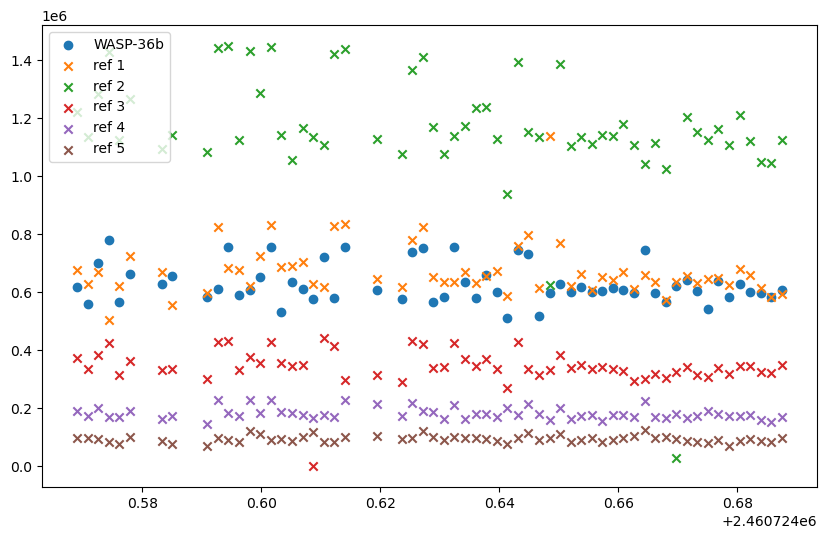

In [109]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(t, wasp36['sum_flux'],label='WASP-36b',)
[plt.scatter(t, refs[i]['sum_flux'], marker='x',label=f'ref {i+1}') for i in range(len(refs))]
plt.legend()
# plt.scatter(t)]

In [168]:
ref_flux = np.array([i['sum_flux'].values for i in refs])
ref_flux.sum(axis=0)

array([2565963.21 , 2370074.09 , 2630328.3  , 2612574.13 , 2307121.39 ,
       2643783.2  , 2346865.87 , 2287439.43 , 2197170.61 , 3022587.19 ,
       2837214.87 , 2393972.31 , 2781944.7  , 2664711.3  , 3020804.78 ,
       2465887.25 , 2364990.2  , 2497412.   , 2047183.659, 2430552.26 ,
       2919205.38 , 2899960.8  , 2410234.4  ,         nan, 2250079.14 ,
       2897392.28 , 2968166.2  , 2451207.6  , 2310057.59 , 2512522.17 ,
       2471539.11 , 2488384.57 , 2540480.37 , 2390453.7  , 2075172.69 ,
       2857533.96 , 2617864.6  , 2336006.1  , 2356331.88 , 2851896.4  ,
       2309130.75 , 2408902.65 , 2328177.24 , 2373218.93 , 2387075.54 ,
       2457230.21 , 2284743.9  , 2353882.9  , 2333541.18 , 2170006.23 ,
       1264948.33 , 2459907.1  , 2357167.5  , 2351650.8  , 2422014.91 ,
       2294588.34 , 2493088.53 , 2396873.07 , 2235947.19 , 2189210.06 ,
       2332192.55 ])

In [169]:
ref_corr = np.nan_to_num(ref_flux, nan=1).sum(axis=0)/5

In [164]:
# ref_flux = 
np.nan_to_num(ref_flux, nan=1).sum(axis=0)

array([6.65334910e+05, 6.05720790e+05, 6.76385500e+05, 6.80670030e+05,
       5.63220290e+05, 6.54185900e+05, 5.84786970e+05, 5.86705830e+05,
       5.18080710e+05, 7.57762890e+05, 7.06828570e+05, 5.91032010e+05,
       7.29436900e+05, 6.54849200e+05, 7.45454880e+05, 6.37714750e+05,
       6.16045000e+05, 6.27666700e+05, 2.84724359e+05, 7.04956360e+05,
       6.69291580e+05, 6.27815700e+05, 6.34461800e+05, 3.00000000e+00,
       5.55873440e+05, 7.50276880e+05, 7.31243200e+05, 6.28735200e+05,
       6.01108290e+05, 7.38290270e+05, 6.29289510e+05, 6.22016770e+05,
       6.45488570e+05, 5.92098600e+05, 5.49062290e+05, 7.03669260e+05,
       6.67132300e+05, 5.86720500e+05, 5.91652280e+05, 6.94047200e+05,
       5.84678150e+05, 6.13117650e+05, 6.09993440e+05, 5.81783930e+05,
       6.05605440e+05, 6.07141010e+05, 5.67376900e+05, 6.50983000e+05,
       5.83340280e+05, 5.71517430e+05, 5.98643060e+05, 5.98360600e+05,
       5.73714400e+05, 5.81306500e+05, 6.10034410e+05, 5.62519040e+05,
      

In [170]:
flux_corr = wasp36['sum_flux'] / ref_corr
flux_corr

0     1.203614
1     1.180713
2     1.334711
3     1.494978
4     1.230436
        ...   
56    1.259364
57    1.250154
58    1.338957
59    1.333666
60    1.302096
Name: sum_flux, Length: 61, dtype: float64

(0.75, 1.2)

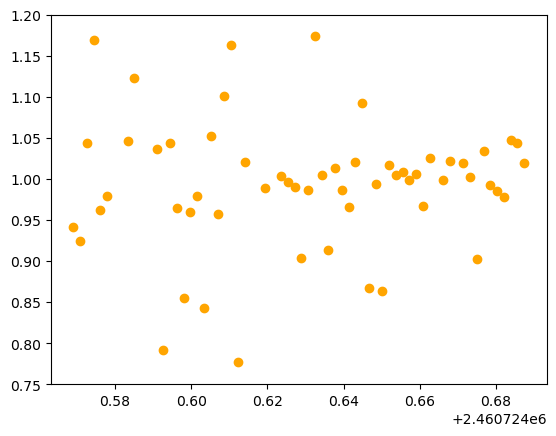

In [171]:
plt.scatter(t,flux_corr/np.nanmedian(flux_corr), label='WASP-36b flux correction', color='orange')
plt.ylim(0.75,1.2)

## New code with auto detection thank god 

In [13]:
!cd /Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/photometry_mplw

In [17]:
import os
os.chdir('/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/photometry_mplw')

In [20]:
!pwd

/Users/bencapistrant/Documents/GitHub/rho_data_reduction_pipeline/photometry_mplw


In [21]:
raw = pd.read_csv('psf_photometry_results.csv')
raw

,File,Star_1_x,Star_1_y,Star_1_flux,Star_2_x,Star_2_y,Star_2_flux,Star_3_x,Star_3_y,Star_3_flux,...,Star_4_flux,Star_5_x,Star_5_y,Star_5_flux,Star_6_x,Star_6_y,Star_6_flux,Star_7_x,Star_7_y,Star_7_flux
0,WASP36B.2025-02-17.0132_reduced.fits,543,406,670671.358690,541,616,1.230202e+06,425,340,748808.664180,...,398131.548894,537,240,219147.349221,683,441,121267.877826,339,720,217803.829754
1,WASP36B.2025-02-17.0167_reduced.fits,543,406,693278.398982,541,616,1.293613e+06,425,340,766917.836826,...,411221.413274,537,240,228006.823317,683,441,131043.238527,339,720,233184.740803
2,WASP36B.2025-02-17.0135_reduced.fits,543,406,741113.374284,541,616,1.324569e+06,425,340,812529.846009,...,427576.178497,537,240,234827.612027,683,441,135535.775694,339,720,240545.413841
3,WASP36B.2025-02-17.0160_reduced.fits,543,406,631126.804051,541,616,1.159217e+06,425,340,697063.871492,...,368808.458265,537,240,201412.481525,683,441,114118.345224,339,720,212279.829392
4,WASP36B.2025-02-17.0175_reduced.fits,543,406,654660.191481,541,616,1.214727e+06,425,340,717283.032517,...,387587.028101,537,240,208826.339027,683,441,117292.412140,339,720,214469.674246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WASP36B.2025-02-17.0188_reduced.fits,543,406,619044.909323,541,616,1.140509e+06,425,340,666627.228648,...,364420.980105,537,240,203567.012957,683,441,109227.982173,339,720,208282.277423
60,WASP36B.2025-02-17.0141_reduced.fits,543,406,226252.331096,541,616,4.466278e+05,425,340,272821.304614,...,140814.927846,537,240,73472.862260,683,441,40949.914843,339,720,86531.333789
61,WASP36B.2025-02-17.0146_reduced.fits,543,406,673934.653581,541,616,1.256664e+06,425,340,777839.786971,...,402278.570694,537,240,222107.530062,683,441,121705.843614,339,720,219633.716376
62,WASP36B.2025-02-17.0153_reduced.fits,543,406,681688.032157,541,616,1.265691e+06,425,340,768137.937688,...,407535.888734,537,240,226674.748692,683,441,126831.808968,339,720,226582.315582


In [22]:
obs_info = pd.read_csv('frame_info.csv')
obs_info

,Directory,File,Object,Date-Obs,Filter,Exptime
0,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0132_reduced.fits,WASP-36B,2025-02-18T01:44:30.345,R,150.0
1,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0167_reduced.fits,WASP-36B,2025-02-18T03:15:50.730,R,150.0
2,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0135_reduced.fits,WASP-36B,2025-02-18T01:52:14.432,R,150.0
3,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0160_reduced.fits,WASP-36B,2025-02-18T02:57:57.963,R,150.0
4,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0175_reduced.fits,WASP-36B,2025-02-18T03:36:17.242,R,150.0
...,...,...,...,...,...,...
59,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0188_reduced.fits,WASP-36B,2025-02-18T04:09:30.453,R,150.0
60,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0141_reduced.fits,WASP-36B,2025-02-18T02:07:33.394,R,150.0
61,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0146_reduced.fits,WASP-36B,2025-02-18T02:21:08.186,R,150.0
62,/Users/bencapistrant/Documents/GitHub/rho_data...,WASP36B.2025-02-17.0153_reduced.fits,WASP-36B,2025-02-18T02:39:07.041,R,150.0


In [24]:
t =[]
for i in range(len(obs_info)):
    t.append(Time(obs_info.at[i, 'Date-Obs'], format='isot', scale='utc').jd)

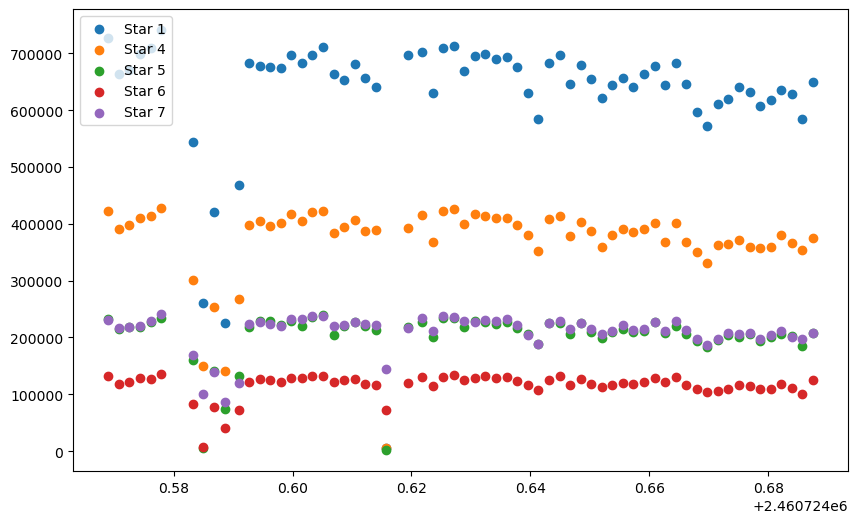

In [56]:
plt.figure(figsize=(10, 6))
for i in [0,3,4,5,6,]:
    plt.scatter(t,raw[f'Star_{i+1}_flux'],label=f'Star {i+1}')
    # print(i)
# plt.scatter(t, wasp36['sum_flux'],label='WASP-36b',)
# [plt.scatter(t, refs[i]['sum_flux'], marker='x',label=f'ref {i+1}') for i in range(len(refs))]
    plt.legend()    

In [51]:
refs = [4,5,6,7]
ref_flux = np.array([raw[f'Star_{i}_flux'].values for i in refs])
ref_corr = ref_flux.sum(axis=0)/len(refs)

In [52]:
wasp36_flux = raw['Star_1_flux'] / ref_corr

(0.95, 1.05)

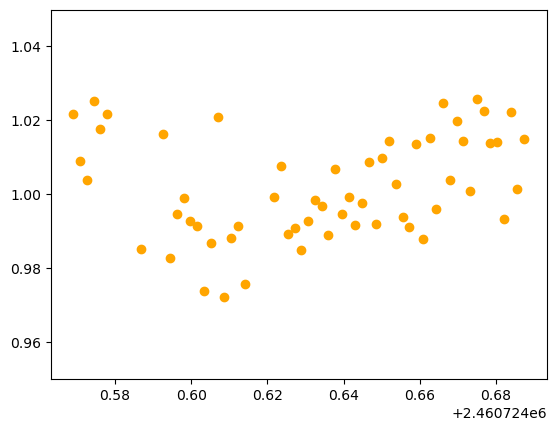

In [55]:
plt.scatter(t,wasp36_flux/np.median(wasp36_flux), label='WASP-36b flux correction', color='orange')
plt.ylim(0.95,1.05)